Notas:
--------

   - [ ] __Construir la variable Recency.__
        - [ ] Sección para caso pequeño
        - [ ] Función para estadnarizar
        - [ ] Probar esta función
        - [ ] Implementar
   - [ ] __Contruir Frecuency__
        - [ ] Sección para caso pequeño
        - [ ] Función para estadnarizar
        - [ ] Probar esta función
        - [ ] Implementar
   - [ ] __Construir Monetary__
        - [ ] Sección para caso pequeño
        - [ ] Función para estadnarizar
        - [ ] Probar esta función
        - [ ] Implementar   

In [1]:
#!jt -l
# !jt -t oceans16 -T
# !jt -r

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [9]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


###  DF_FULL

##### Abrir Archivo  

In [10]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas_Full'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_FULL = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
DF_FULL.head(1)

,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Tipo de material.1,Marca,Nivel 2,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-02-09,12.0,13685.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO


#### Funcion

In [11]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
        df[i]=df[i].astype('float64').astype('int64')
        
#=================================
# Agregar nombre al codigo del producto
#=================================
    def material_name(x):
        s1=str(x['Material'])
        s2=str(x['Nivel 4.1'])
        return(s1+'('+s2+')')
    df['Material (Nombre)']=df.apply(lambda x:  material_name(x), axis=1)
    


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
    df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
    df=df[df['Día Semana']!='Domingo']
    
    DF_FULL.dtypes
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

### Datos año de inicio
#### Rename

In [12]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(DF_FULL).rename(
    columns={'Precio Promedio':'Precio'
            #,'Centro.1':'Centro'
            })
data['Centro_cod']=data['Centro']
data['Centro']=data['Centro.1']

data[data.Año>=int(Año_inicio)]
data.dtypes

Time Lapsed = 0:0:20.72281551361084 
 H:m:s


Zona de ventas          object
Zona de ventas.1        object
Cliente                 object
Cliente.1               object
Cliente - Local         object
Cliente - Local.1       object
Material                object
Día natural             object
Kilos Venta KG           int64
Venta Neta               int64
Precio                   int64
Frecuencia Historica    object
Centro                  object
Centro.1                object
Población               object
Tipo de cliente         object
Cluster                 object
Segmento                object
Segmento.1              object
Categoría Cliente       object
Zona de reparto         object
Año Creación            object
Material Favorito       object
Semana                  object
Mes                     object
Año                      int64
Nivel 4                 object
Nivel 4.1               object
Sector                  object
Tipo de material        object
Tipo de material.1      object
Marca                   object
Nivel 2 

In [13]:
#=============================
# Se eliminaron los regristros donde existen dias domingos
#(No hay despacho los dias domingos)
#============================

data.shape[0] - DF_FULL.shape[0]

-256

# Selección data(Canal/material)

In [14]:
end_time = time.time()
time_lapsed = end_time - start_time
time_convert(time_lapsed)


Time Lapsed = 0:0:27.25297260284424 
 H:m:s


data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

## data 

##### Definición del producto 

In [15]:
#==============================
# Se define el producto
#==============================
i_producto=Y_producto
print(i_producto
     ,Tipo_de_Cliente)

data_i=data[
    (data['Tipo de cliente']==Tipo_de_Cliente)
    &(data.Material==i_producto)
].copy()


1010078 Tradicional


### Columnas a usar 
rename aplicado a `Precio promedio`

###### Columnas a usar 

In [16]:
#=======================================================================================================
                                                # Columnas a usar
#========================================================================================================

data_i=data_i[[
                    #======================================   
                                    # Base de la venta
                    #--------------------------------------

'Material (Nombre)',
    #ID Nombre
    
#========================
#Cantidad/Ingreso/Precio
#------------------------
'Kilos Venta KG',
#'Venta Neta', No es necesario o de interes para la prediccion
'Precio',

#========================
#fecha
#------------------------
'Día natural', #Se descarta por series de tiempo
    # Ver si funciona

'Día Semana',
    #lun, Mart, Mier, Juev
'Semana',
    #1, 2 , 3 ,..., 52, 53
'Mes',
    #1,2,3,...,12
'Año',
    #2018,2019,...,2021
    
    

#______________________________________________________________________
                        
                                    # CLIENTE
    
#=====================================
#Ubicacion del cliente
#-------------------------------------
'Población', #'Zona de reparto',
#Comuna del Cliente ; Codigo de la zona de reparto
#[No son excluyentes, la Zona de reparto
#Es más especifica y agrupa a clientes]


                #Region
                #'Zona de ventas',
                #'Zona de ventas.1',
                    #(Z001: Santiago)

#Es atendido por la Centro:
'Centro', #'Centro', Centro de distribución de los productos
    #ID Centro, Nombre Centro(oficina o centro)
    
#=========================================    
#Identificacion del cliente
#---------------------------------------
'Cliente', #'Cliente.1',
     #ID del cliente , #nombre del cliente
 #'Cliente - Local', 'Cliente - Local.1'
     # Tambien funciona como ID
         #ID, Nombre

    #Agrupacion del cliente
    #'Tipo de cliente', #SON TODOS IGUALES
    'Cluster', 
         #Canal del cliente ; Tipo de cliente
             #Tradicional   ; Clasico

    #Nivel de cobertura
    #'Segmento', 
     'Segmento.1',
     #codigo ; nombre
         #50 ; Cobertura pequeno SD
    'Categoría Cliente',
            #Especialista en Proc


    #===================================================
    #Caracteristicas Adiocinales a su consumo
    #-------------------------------------------------
        'Año Creación',
            #Fecha de afiliación a Agrosuper
             #-> Debe ser INT idealmente

        'Material Favorito',
             #ID del producto que ha comprado más frecuentemente
             #(No por cantidad, si no que por cantidad de compras realizadas)
                 #-> Puede ser solo el codigo o el nombre tambien

        'Frecuencia Historica',
             #Cantidad de compras realizadas desde el 2018
                 #-> debe ser INT
                     #-> constante para todas las compras
                            # Al ser variable complejiza todo
 
]]


###### Ajuste de type de columnas 

In [17]:
data_i['Frecuencia Historica']=data_i['Frecuencia Historica'].astype('int64')
data_i['Año Creación']=data_i['Año Creación'].astype('int64')

In [18]:
#Ajuste Columnas 
data_i.Año=data_i.Año.astype('category')
print(data_i.Año.dtype)
data_i['Mes_num']=data_i["Mes"]#.apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i['Mes']=data_i["Mes_num"].apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i[['Mes','Mes_num','Día natural']].head()
print(data_i.shape)
data_i.head(2)

category
(198596, 18)
(198596, 18)
(198596, 18)


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5
61456,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3


##### brebe analisis 

###### Diferencias en filas y columnas, data base 

In [19]:
#======================================
# Disminución de las filas y columnas
# al pasar a data_i
#======================================

print('Data Full',DF_FULL.shape)
print(data.shape[0]-DF_FULL.shape[0],
      data.shape[1]-DF_FULL.shape[1])
print('Data Año',data.shape)
print(data_i.shape[0]-data.shape[0],
      data_i.shape[1]-data.shape[1])
print('Data Año, Canal Producto',data_i.shape)

Data Full (1061161, 40)
-256 3
Data Año (1060905, 43)
-862309 -25
Data Año, Canal Producto (198596, 18)


###### Describe 

In [20]:
desc=data_i.describe(include='all').reset_index()
desc[desc['index']=='unique']

,index,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num
1,unique,1,NaN,NaN,1140,6,53,12,4.0,46,3,5073,3,3,5,NaN,13,NaN,12


## Dicionario 
rename aplicado a `Precio promedio`

In [21]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
        }

##### Revision

In [22]:
#List sirve para definir las columnas de interes para los datos
list_=[]
for i in Dic_col:
    list_+=Dic_col[i]
print(len(list_))
print((list_))


17
['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente', 'Día natural', 'Día Semana', 'Semana', 'Mes', 'Año', 'Centro', 'Población', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación', 'Material Favorito', 'Frecuencia Historica']


In [23]:
print(Dic_col.keys())
Columnas_a_usar=[j for i in 
                 ['Base','Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos']
                 for j in Dic_col[i]  ]
print(Columnas_a_usar,len(Columnas_a_usar))
data[Columnas_a_usar].head(2)


dict_keys(['Base', 'Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos'])
['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente', 'Día natural', 'Día Semana', 'Semana', 'Mes', 'Año', 'Centro', 'Población', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación', 'Material Favorito', 'Frecuencia Historica'] 17


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año,Centro,Población,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica
0,1010077(Trutro Entero Selección),12,1190,10003742,2018-02-09,Viernes,6,2,2018,Sucursal Lo Espejo,La Pintana,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19
1,1010077(Trutro Entero Selección),12,1350,10003742,2018-05-04,Viernes,18,5,2018,Sucursal Lo Espejo,La Pintana,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19


In [24]:
for i in list(list_+['Tipo de cliente']):
    print(i,data[list_+['Tipo de cliente']].iloc[:1,:][i].to_list())

Material (Nombre) ['1010077(Trutro Entero Selección)']
Kilos Venta KG [12]
Precio [1190]
Cliente ['10003742']
Día natural [datetime.date(2018, 2, 9)]
Día Semana ['Viernes']
Semana ['6']
Mes ['2']
Año [2018]
Centro ['Sucursal Lo Espejo']
Población ['La Pintana']
Cluster ['Clásico']
Segmento.1 ['Cobertura Pequeno SD']
Categoría Cliente ['Especialista en Proc']
Año Creación ['2007']
Material Favorito ['1010077']
Frecuencia Historica ['19']
Tipo de cliente ['Tradicional']


# R Recency, (Frescura)

- [ ] __Caracteristica Cliente__
>El tiempo que lleva sin realizar una compra en días.
Se busca el registro más nuevo por cliente y se calcula el delta con el registro más nuevo de los datos.


 - [ ] __Feature of puchad__
>Además se planea construir una columna, para definir el recency de cada transacción para definir si influye en el precio.

## inicio 

##### Columnas 

In [25]:
Dic_col

{'Base': ['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente'],
 'Fecha': ['Día natural', 'Día Semana', 'Semana', 'Mes', 'Año'],
 'Ubicacion': ['Centro', 'Población'],
 'Cliente Categoria': ['Cluster', 'Segmento.1', 'Categoría Cliente'],
 'Cliente Atributos': ['Año Creación',
  'Material Favorito',
  'Frecuencia Historica']}

In [26]:
data_i[Dic_col['Base']
       +Dic_col['Fecha']].head()

,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año
61455,1010078(Trutro Entero Selección),22,1300,10003742,2020-05-23,Sábado,21,Mayo,2020
61456,1010078(Trutro Entero Selección),110,1174,10007508,2018-03-01,Jueves,9,Marzo,2018
61457,1010078(Trutro Entero Selección),66,1174,10007508,2018-03-08,Jueves,10,Marzo,2018
61458,1010078(Trutro Entero Selección),66,1033,10007508,2018-03-20,Martes,12,Marzo,2018
61459,1010078(Trutro Entero Selección),65,1100,10007508,2018-03-27,Martes,13,Marzo,2018


In [27]:
data_i[Dic_col['Fecha'][0]].max()

datetime.date(2021, 10, 26)

In [28]:
(data_i[Dic_col['Fecha'][0]].max() -
data_i[Dic_col['Fecha'][0]].min()).days

1393

## Prueba pequ 

##### Data

In [29]:
df=data_i[(data_i['Población'] =='La Florida')].copy()
df.Cliente.unique().shape

(239,)

###### Mini data 

In [30]:
df_X=df[df.Cliente=='10077788'][Dic_col['Base']
       +Dic_col['Fecha']]
print(df_X.shape)
df_X.head(3)

(39, 9)


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año
62396,1010078(Trutro Entero Selección),44,1250,10077788,2020-08-06,Jueves,32,Agosto,2020
62397,1010078(Trutro Entero Selección),22,1390,10077788,2020-08-20,Jueves,34,Agosto,2020
62398,1010078(Trutro Entero Selección),22,1450,10077788,2020-08-27,Jueves,35,Agosto,2020


##### Función 

###### Función con aplicación de row 

In [31]:
DF_G=data_i[Dic_col['Base']
       +Dic_col['Fecha']].copy()
Client_Count=0
def R_lamd(X):
    """
    Función que sirve para calcular Recency
    df['Recency']=df.apply( (lambda x: F_lamd(x)) , axis=1)
    df.head()
    """
    
#     index.Index_x=X.Index
    id_C=(X.Cliente)
    F_X=X['Día natural']
    
#     print(id_C,F_X)
    df_ant=DF_G[
        (DF_G['Día natural']<=F_X)
        &(DF_G.Cliente==id_C)
        ]
    df_len=df_ant.shape[0]
#     print(df_len)
    if(df_ant.shape[0]==1):
#         print(0)
#         print(df_ant)
        return(datetime.timedelta(days=0))
    else:
#         print(df_ant.iloc[df_len-2])
        return((F_X -  df_ant.iloc[df_len-2]['Día natural']))

R_lamd(df_X.iloc[1])

datetime.timedelta(days=14)

###### Aplicación a data frame 

In [32]:
#==================================
#          Example
#    input("Press Enter to start")
#    start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

start_time_2 = time.time()
df['Recency']=df.apply( (lambda x: R_lamd(x)) , axis=1)
end_time_2 = time.time()
time_lapsed_2 = end_time_2 - start_time_2
time_convert(time_lapsed_2)
df.head()

Time Lapsed = 0:3:11.388916492462158 
 H:m:s


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency
62396,1010078(Trutro Entero Selección),44,1250,2020-08-06,Jueves,32,Agosto,2020,La Florida,Sucursal Huechuraba,10077788,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1010267,44,8,0 days
62397,1010078(Trutro Entero Selección),22,1390,2020-08-20,Jueves,34,Agosto,2020,La Florida,Sucursal Huechuraba,10077788,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1010267,44,8,14 days
62398,1010078(Trutro Entero Selección),22,1450,2020-08-27,Jueves,35,Agosto,2020,La Florida,Sucursal Huechuraba,10077788,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1010267,44,8,7 days
62399,1010078(Trutro Entero Selección),22,1420,2020-08-31,Lunes,36,Agosto,2020,La Florida,Sucursal Huechuraba,10077788,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1010267,44,8,4 days
62400,1010078(Trutro Entero Selección),44,1630,2020-09-17,Jueves,38,Septiembre,2020,La Florida,Sucursal Huechuraba,10077788,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1010267,44,9,17 days


In [33]:
# 239
len(df.Cliente.unique())

239

In [34]:
df[df.Recency==datetime.timedelta(days=0)].shape

(239, 19)

## Prueba Real 

```python 
df_P=data_i.copy()
start_time_3 = time.time()
df_P['Recency']=df_P.apply( (lambda x: R_lamd(x)) , axis=1)
end_time_3 = time.time()
time_lapsed_3 = end_time_3 - start_time_3
print('Recency de data_i')
time_convert(time_lapsed_3)

print('Recency total')
time_convert(end_time_3 - start_time)

df_P.head()

# Recency de data_i
# Time Lapsed = 1:5:28.39366388320923 
#  H:m:s
# Recency total
# Time Lapsed = 1:9:21.014468669891357 
#  H:m:s
```

## Save CSV 

```python 
File_save_CSV=file_direct_O+'data_1010078_CT R'+'.csv'

df_P.to_csv(File_save_CSV, encoding='utf-8',index=True,sep=';')

end_time_4 = time.time()
time_lapsed_4 = end_time_4 - end_time_3
time_lapsed_final = end_time_4 - start_time

print('Guardado df')
time_convert(time_lapsed_4)

print('Recency total codigo')
time_convert(time_lapsed_final)

# Guardado df
# Time Lapsed = 0:0:5.454247236251831 
#  H:m:s
# Recency total codigo
# Time Lapsed = 1:9:26.46871590614319 
#  H:m:s
```

# Uso de R file

In [25]:
print('data_1010078_CT R'+'.csv')

data_1010078_CT R.csv


## Abrir Archivo  

Se debe agregar el parametro `,index_col='Unnamed: 0'` de esta froma tal vez se pueda hacer un merge en base al indice

##### abrir 

In [26]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT R'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_R = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )
#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
data_i_R.head(1)

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,0 days


##### Funcion

###### def 

In [27]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data_Refinada(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

    
    
#=================================
# Proceso Recency a Int 
#=================================
        
    df['Recency días']=df['Recency'].apply( lambda x:  x.split(' ')[0])
    
#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG'
#               ,'Venta Neta'
              ,'Precio'
              ,'Recency días'
             ]:
        df[i]=df[i].astype('float64').astype('int64')
        
# #=================================
# # Agregar nombre al codigo del producto
# #=================================
#     def material_name(x):
#         s1=str(x['Material'])
#         s2=str(x['Nivel 4.1'])
#         return(s1+'('+s2+')')
#     df['Material (Nombre)']=df.apply(lambda x:  material_name(x), axis=1)
    


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #ELiminado de DF_FULL
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    
#     df['Año']=df['Año'].astype('int64')
#     D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
#     df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
#     df=df[df['Día Semana']!='Domingo']
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

###### palicación 

In [28]:
data_i_R=Ajuste_data_Refinada(data_i_R)
data_i_R.head(2)

Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Recency                 object
Recency días             int64
dtype: object
Time Lapsed = 0:0:1.6745195388793945 
 H:m:s


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Recency días
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,0 days,0
61456,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3,0 days,0


## Exploración R

##### histograma 

In [29]:
data_i_R.shape

(198596, 20)

<AxesSubplot:>

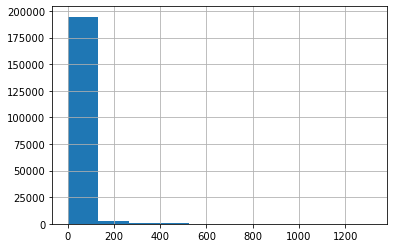

In [30]:
data_i_R[data_i_R.columns[19]].hist()

In [31]:
data_i_R\
[data_i_R.columns[19]].describe()

count    198596.000000
mean         16.872530
std          45.846675
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max        1316.000000
Name: Recency días, dtype: float64

In [32]:
data_i_R[(data_i_R.Año=='2021')]\
[data_i_R.columns[19]].describe()

count    63389.000000
mean        19.409503
std         51.405541
min          0.000000
25%          3.000000
50%          7.000000
75%         14.000000
max       1316.000000
Name: Recency días, dtype: float64

In [33]:
data_i_R[(
    data_i_R[data_i_R.columns[19]]
    >=1312)
]

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Recency días
124082,1010078(Trutro Entero Selección),22,1350,2021-09-23,Jueves,38,Septiembre,2021,Lo Prado,Sucursal Miraflores,14443986,Clásico,Cobertura Pequeno SD,Emprendedores,2007,1010078,10,9,1316 days,1316


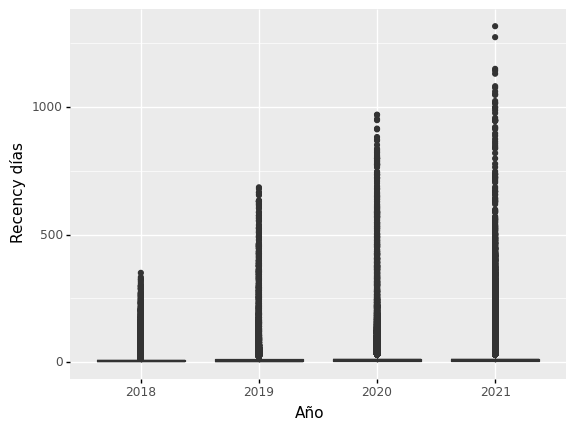

<ggplot: (180343676311)>

In [64]:
ggplot(data_i_R,aes(x='Año'
                    ,y='Recency días'))\
+geom_boxplot()
# (mapping=None, data=data_i_R, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

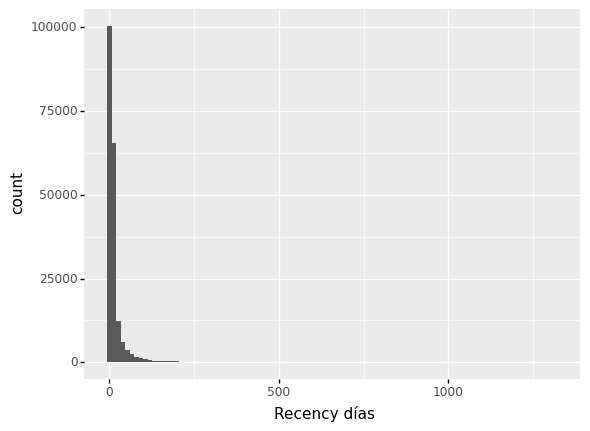

<ggplot: (180305699684)>

In [57]:
ggplot(data_i_R,aes(x='Recency días'))\
+geom_histogram(bins=100)
# (mapping=None, data=data_i_R, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

##### Disperción 

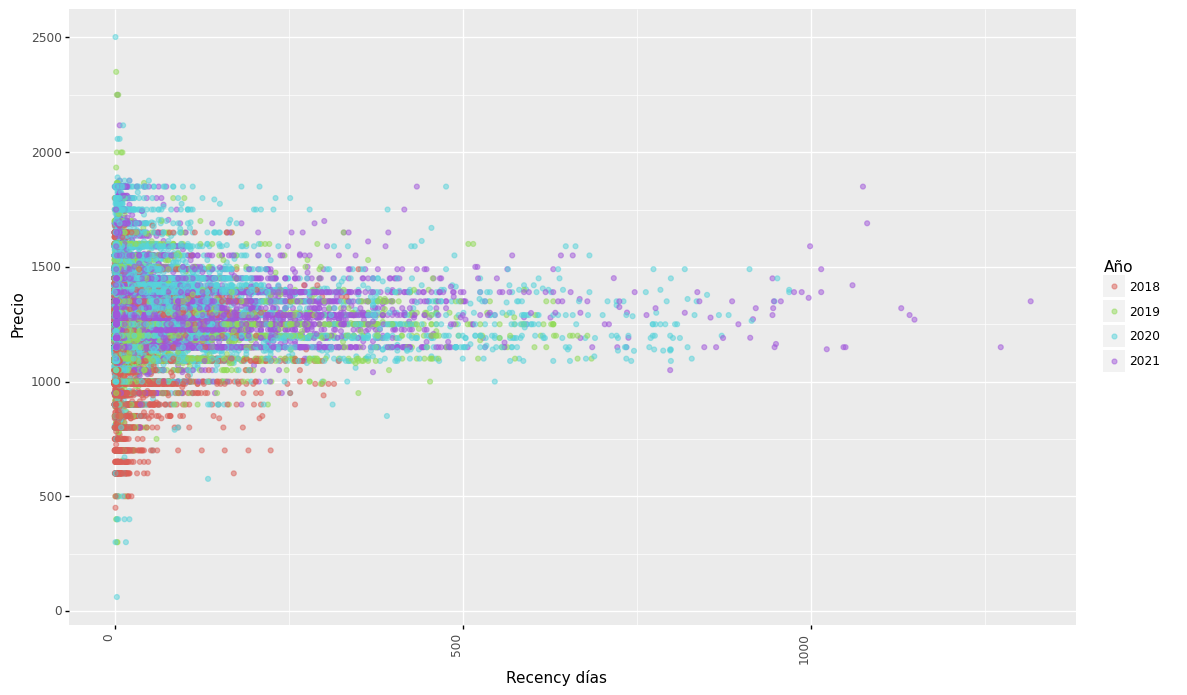

<ggplot: (180387287851)>

In [73]:
df=data_i_R.copy()
X_Graph='Recency días'
Y_Graph='Precio'
df[X_Graph]=df[X_Graph].astype('int64')
# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color='Año'
                 ))
+geom_point(alpha=0.5)
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 

)      

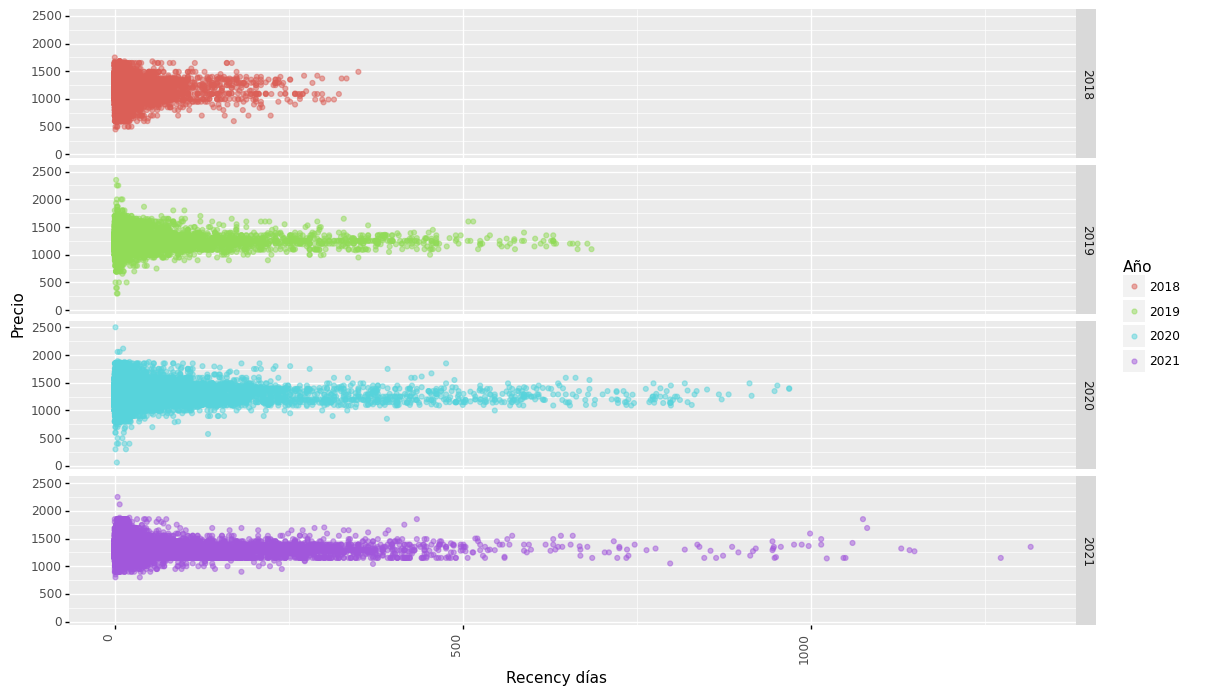

<ggplot: (180432580910)>

In [77]:
df=data_i_R.copy()
X_Graph='Recency días'
Y_Graph='Precio'
df[X_Graph]=df[X_Graph].astype('int64')
# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color='Año'
                 ))
+geom_point(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 

)      

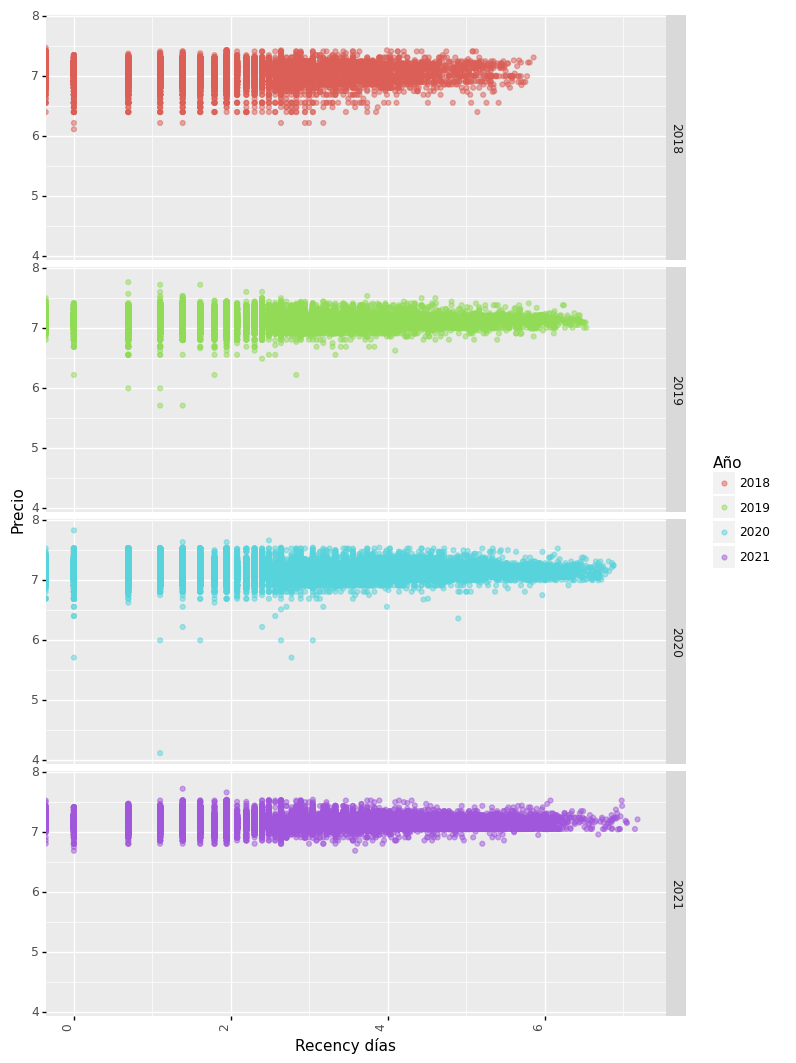

<ggplot: (180471529972)>

In [78]:
df=data_i_R.copy()
X_Graph='Recency días'
#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph='Año'


#int
df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color=Color_Graph
                 ))
+geom_point(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,13)) 

)      

In [79]:
Dic_col['Base']

['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente']

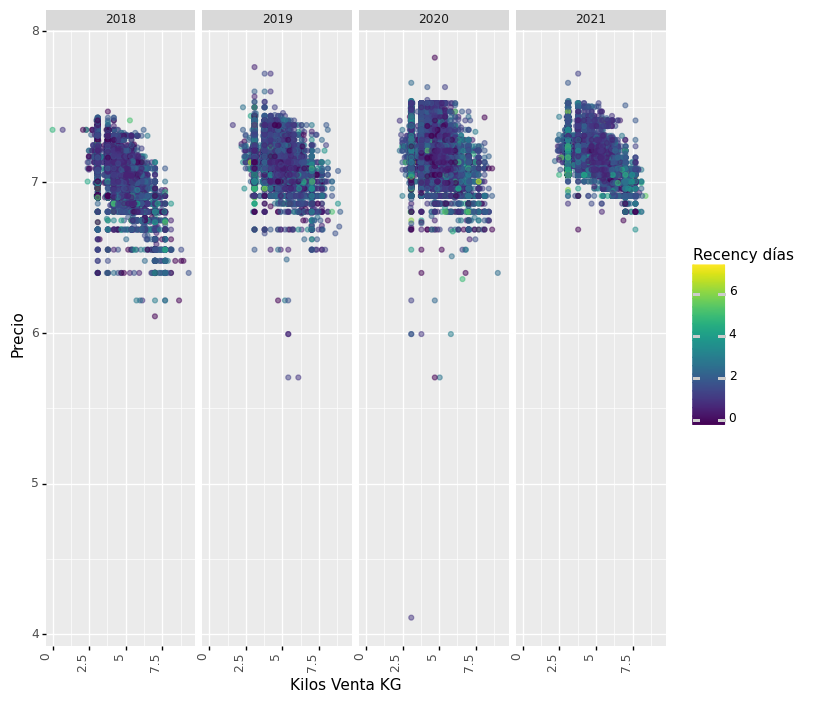

<ggplot: (180416635609)>

In [83]:
df=data_i_R.copy()
X_Graph='Kilos Venta KG'
Y_Graph='Precio'
Color_Graph='Recency días'


#int
df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color=Color_Graph
                 ))
+geom_point(alpha=0.5)
+facet_grid('.~Año')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

###### Descripción por cliente 

In [38]:
df_G=data_i_R[['Cliente','Recency días']].groupby('Cliente').describe()
df_G

Recency días                                                     
                count       mean        std  min   25%   50%    75%    max
Cliente                                                                   
10003742          1.0   0.000000        NaN  0.0   0.0   0.0   0.00    0.0
10007508        208.0   6.418269   7.085609  0.0   2.0   5.0   7.00   42.0
10017269         78.0  17.500000   8.773854  0.0  14.0  14.0  21.00   49.0
10023880         20.0  49.300000  82.268559  0.0   7.0  22.5  57.75  357.0
10028999         13.0  53.000000  33.266600  0.0  35.0  49.0  63.00  136.0
...               ...        ...        ...  ...   ...   ...    ...    ...
9992154          70.0  15.000000  20.255613  0.0   5.0   7.0  17.75  112.0
9993925         543.0   2.565378   1.298189  0.0   2.0   2.0   3.00   14.0
9994662          11.0  55.636364  44.913857  0.0  24.0  39.0  80.50  157.0
9994800           3.0  65.333333  95.552778  0.0  10.5  21.0  98.00  175.0
9997223           1.0   0.000000        NaN  0.0   0.0   0.0   0.00    0.0

[5073 rows x 8 columns]

### PRUEBA

##### data chica

In [39]:
df=data_i[(data_i['Población'] =='La Florida')].copy()
df.Cliente.unique().shape

(239,)

In [40]:
df=data_i_R[(data_i_R['Población'] =='Las Condes')].copy()
print(df.shape)
df.Cliente.unique().shape

(1079, 20)


(46,)

In [41]:
data_i_R['Día natural'].max()

datetime.date(2021, 10, 26)

#### groupby selección ultima fecha each client 

In [42]:
df_fecha_fin=df[['Cliente','Día natural']].groupby('Cliente').max().reset_index()#
print(df_fecha_fin.shape)
df_fecha_fin.head()

(46, 2)


,Cliente,Día natural
0,10537676,2021-05-10
1,11263733,2021-10-23
2,11437928,2021-09-01
3,11566484,2021-08-23
4,11862820,2020-09-12


###### aclculo de recency final 

In [43]:
#     df['Recency días']=df['Recency'].apply( lambda x:  x.split(' ')[0])
df_fecha_fin['Recency ultimo']=\
df_fecha_fin['Día natural'].apply( lambda x: (datetime.date(2021, 10, 26) - x).days)
#.apply( lambda x:  x.split(' ')[0])
df_fecha_fin

,Cliente,Día natural,Recency ultimo
0,10537676,2021-05-10,169
1,11263733,2021-10-23,3
2,11437928,2021-09-01,55
3,11566484,2021-08-23,64
4,11862820,2020-09-12,409
5,12197874,2021-04-10,199
6,13472461,2021-10-23,3
7,13664118,2020-04-06,568
8,14232412,2021-09-04,52
9,14676322,2021-09-11,45


##### Grafico 

###### plop

<AxesSubplot:>

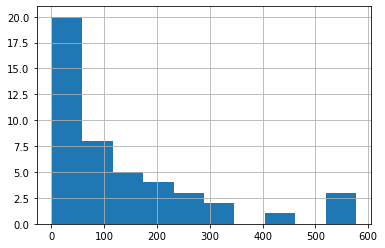

In [44]:
df_fecha_fin['Recency ultimo'].hist()

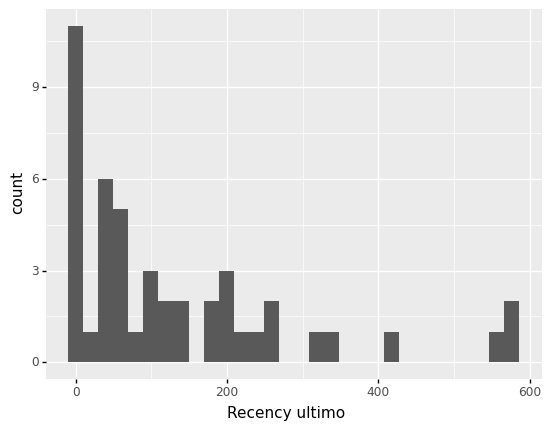

<ggplot: (180305832126)>

In [66]:
ggplot(df_fecha_fin,aes(x='Recency ultimo'))\
+geom_histogram(bins=30)\
+

    #binwidth=0.5)
# (mapping=None, data=data_i_R, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

#### exploración atipicos 

In [46]:
df_fecha_fin.head()

,Cliente,Día natural,Recency ultimo
0,10537676,2021-05-10,169
1,11263733,2021-10-23,3
2,11437928,2021-09-01,55
3,11566484,2021-08-23,64
4,11862820,2020-09-12,409


In [47]:
df_fecha_fin.describe()

,Recency ultimo
count,46.000000
mean,134.630435
std,152.722458
min,1.000000
25%,22.750000
50%,78.000000
75%,197.250000
max,577.000000


In [48]:
df_fecha_fin[df_fecha_fin['Recency ultimo']==577]

,Cliente,Día natural,Recency ultimo
38,76861617,2020-03-28,577


In [49]:
df[df.Cliente=='76861617']

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Recency días
237526,1010078(Trutro Entero Selección),22,1150,2020-02-08,Sábado,6,Febrero,2020,Las Condes,Sucursal Huechuraba,76861617,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1020253,7,2,0 days,0
237527,1010078(Trutro Entero Selección),44,1338,2020-03-28,Sábado,13,Marzo,2020,Las Condes,Sucursal Huechuraba,76861617,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1020253,7,3,49 days,49


In [50]:
data_i_R[data_i_R.Cliente=='76861617']

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Recency días
237526,1010078(Trutro Entero Selección),22,1150,2020-02-08,Sábado,6,Febrero,2020,Las Condes,Sucursal Huechuraba,76861617,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1020253,7,2,0 days,0
237527,1010078(Trutro Entero Selección),44,1338,2020-03-28,Sábado,13,Marzo,2020,Las Condes,Sucursal Huechuraba,76861617,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1020253,7,3,49 days,49


In [51]:
data[(data.Cliente=='76861617')&(data.Año==2021)][Dic_col['Base']+['Día natural']]

,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural
506488,1020253(Pierna Pulpa 57),22,2900,76861617,2021-03-20
631841,1020010(Pierna Pulpa 59),87,1950,76861617,2021-08-21
843943,1010002(Con Menudencia >2.130),16,1390,76861617,2021-04-10


###### otro 

In [52]:
df[['Cliente','Día natural']].groupby('Cliente').max().reset_index().head()

,Cliente,Día natural
0,10537676,2021-05-10
1,11263733,2021-10-23
2,11437928,2021-09-01
3,11566484,2021-08-23
4,11862820,2020-09-12


In [53]:
df_G=data_i_R[['Cliente','Recency días']].groupby('Cliente').describe()
df_G

Recency días                                                     
                count       mean        std  min   25%   50%    75%    max
Cliente                                                                   
10003742          1.0   0.000000        NaN  0.0   0.0   0.0   0.00    0.0
10007508        208.0   6.418269   7.085609  0.0   2.0   5.0   7.00   42.0
10017269         78.0  17.500000   8.773854  0.0  14.0  14.0  21.00   49.0
10023880         20.0  49.300000  82.268559  0.0   7.0  22.5  57.75  357.0
10028999         13.0  53.000000  33.266600  0.0  35.0  49.0  63.00  136.0
...               ...        ...        ...  ...   ...   ...    ...    ...
9992154          70.0  15.000000  20.255613  0.0   5.0   7.0  17.75  112.0
9993925         543.0   2.565378   1.298189  0.0   2.0   2.0   3.00   14.0
9994662          11.0  55.636364  44.913857  0.0  24.0  39.0  80.50  157.0
9994800           3.0  65.333333  95.552778  0.0  10.5  21.0  98.00  175.0
9997223           1.0   0.000000        NaN  0.0   0.0   0.0   0.00    0.0

[5073 rows x 8 columns]